# Assignment 4. Decision Trees
## Introduction
We're using the red wine quality dataset (https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) to predict the quality of red wine based on certain variables.
## Step 1. Initializing imports.

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import UndefinedMetricWarning

## Step 2. Loading and transforming the dataset
As we can see, the 'quality' variable has integer values from 3 to 8 included. I decided to split those variable in three bins:

[3-4] - bad - 0; 

[5-6] - average - 1; 

[7-8] - good - 2.

In [2]:
df = pd.read_csv('winequality-red.csv')
df['quality_bins'] = pd.cut(df['quality'], [2,4,6,8], labels=[0,1,2])
y = df['quality_bins'].values
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bins
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


### Step 2.1. Dropping the dependent variables

In [3]:
df = df.drop(['quality', 'quality_bins'], axis=1)
X = df.to_numpy()

## Step 3. Splitting the train and test sets.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

## Step 4. Fitting the decision trees model and visualizing.

In [5]:
def treeClassifier():
    tree = DecisionTreeClassifier()
    tree_fit = tree.fit(x_train, y_train)
    predictions = tree.predict(x_test)
    print(classification_report(y_test, predictions))
    score = tree_fit.score(x_test, y_test)
    cm = metrics.confusion_matrix(y_test, predictions)
    #print(cm)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, linewidths=.5, fmt='d', square = True, cmap = 'Reds', xticklabels=['bad','average','good'], yticklabels=['bad','average','good']);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

              precision    recall  f1-score   support

           0       0.16      0.19      0.18        31
           1       0.89      0.86      0.88       678
           2       0.40      0.47      0.43        91

    accuracy                           0.79       800
   macro avg       0.48      0.51      0.50       800
weighted avg       0.81      0.79      0.80       800



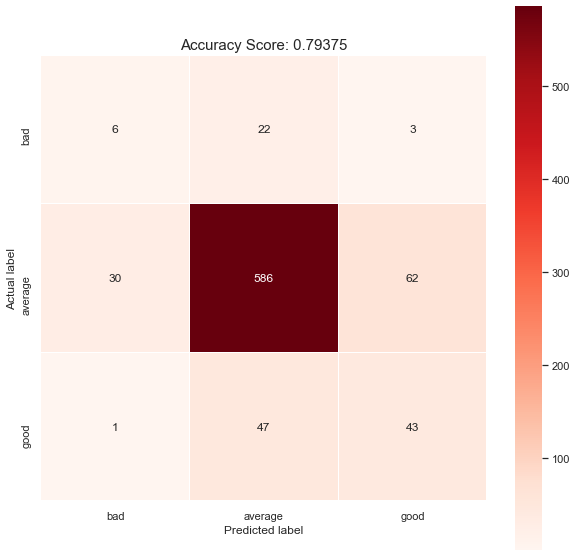

In [6]:
treeClassifier()

## Step 5. Fitting the logistic regression model and visualizing.

In [7]:
@ignore_warnings(category=ConvergenceWarning)
@ignore_warnings(category=UndefinedMetricWarning)
def logisticClassifier():
    logisticRegr = LogisticRegression(multi_class='auto')
    logisticRegr.fit(x_train, y_train)
    score = logisticRegr.score(x_test, y_test)
    predictions = logisticRegr.predict(x_test)
    print(classification_report(y_test, predictions))
    cm = metrics.confusion_matrix(y_test, predictions)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm, annot=True, linewidths=.5, fmt='d', square = True, cmap = 'Reds',xticklabels=['bad','average','good'], yticklabels=['bad','average','good']);
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.88      0.95      0.92       678
           2       0.52      0.38      0.44        91

    accuracy                           0.85       800
   macro avg       0.47      0.45      0.45       800
weighted avg       0.81      0.85      0.83       800



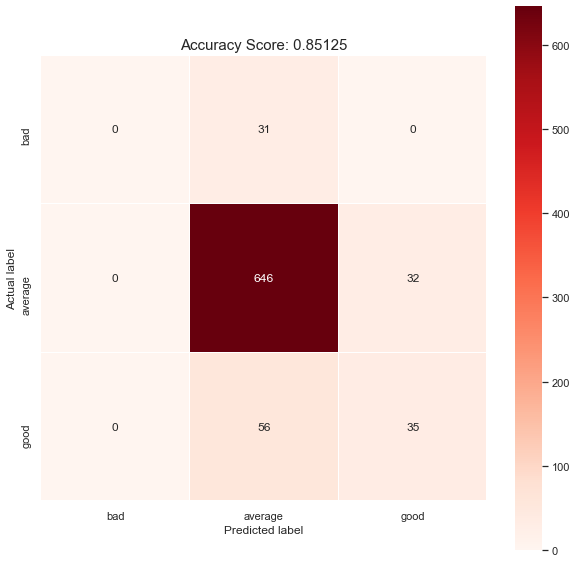

In [8]:
logisticClassifier()

## Step 6. Conclusion.
As we can see, the logistic regression model has performed slightly better than the decision tree. It has better precision and accuracy.
However, it has not predicted any of the 'bad' wines correctly, but it was much better at predicting the 'average' wines. That probably happened because there are way more 'average' wines than others. Overall, both models performed well.